In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from napari import Viewer
viewer = Viewer()

In [4]:
from tseg.widgets import io

C:\Users\Alireza Vaezi\tseg_output


In [10]:
viewer.window.add_plugin_dock_widget("tseg", "Input/Output")

(<napari._qt.widgets.qt_viewer_dock_widget.QtViewerDockWidget at 0x26352430ca0>,
 <tseg.widgets.io.InputOutputWidget at 0x26352e2f6d0>)

subregion: 29 c_val 7
subregion: 13 c_val 7
subregion: 6 c_val 7
subregion: 6 c_val 2
subregion: 6 c_val 38
subregion: 2 c_val 38
subregion: 28 c_val 38
subregion: 28 c_val 38
subregion: 28 c_val 38
subregion: 28 c_val 38
subregion: 28 c_val 38


In [11]:
viewer.window.add_plugin_dock_widget("tseg", "Pre-Processing")

C:\Users\Alireza Vaezi\tseg_output


(<napari._qt.widgets.qt_viewer_dock_widget.QtViewerDockWidget at 0x26345601fc0>,
 <tseg._widget.PreProcessingWidget at 0x263845cd360>)

subregion: 28 c_val 38


C:\Users\Alireza Vaezi\Desktop\The Big Projects\TOXO PARENT\TSEG\tseg\src\tseg\prep.py:16: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(image + 1))
C:\Users\Alireza Vaezi\Desktop\The Big Projects\TOXO PARENT\TSEG\tseg\src\tseg\prep.py:20: RuntimeWarning: invalid value encountered in cast
  log_image = np.array(log_image, dtype=np.uint8)
C:\Users\Alireza Vaezi\Desktop\The Big Projects\TOXO PARENT\TSEG\tseg\src\tseg\prep.py:16: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(image + 1))
C:\Users\Alireza Vaezi\Desktop\The Big Projects\TOXO PARENT\TSEG\tseg\src\tseg\prep.py:20: RuntimeWarning: invalid value encountered in cast
  log_image = np.array(log_image, dtype=np.uint8)


subregion: 28 c_val 71
subregion: 28 c_val 71
subregion: 18 c_val 71


In [9]:
viewer.window.add_plugin_dock_widget("tseg", "Segmentation")

C:\Users\Alireza Vaezi\tseg_output


(<napari._qt.widgets.qt_viewer_dock_widget.QtViewerDockWidget at 0x26352e2cb80>,
 <tseg._widget.SegWidget at 0x263852dcaf0>)

In [1]:
import plantseg
from plantseg.core.zoo import ModelZoo

INFO: P [MainThread] 2024-12-18 13:32:38,220 plantseg - Logger configured at initialisation. PlantSeg logger name: plantseg


In [2]:
mz = ModelZoo(plantseg.PATH_MODEL_ZOO, plantseg.PATH_MODEL_ZOO_CUSTOM)

In [3]:
m1 = mz.get_model_names()[0]

models  = mz.models
t = models["id"]



In [4]:
from pathlib import Path
from plantseg.tasks import import_image_task, unet_prediction_task

input_path = Path(r"D:\toxo\Cole_002\Cole_002_TiffStack\002t01z05.tif")

In [6]:

plantseg_image = import_image_task(input_path=input_path, semantic_type="raw", stack_layout="YX")  # Specify the semantic type: 'raw', 'segmentation', or 'prediction'  # Specify the stack layout: '3D', '2D', or '2D_time'


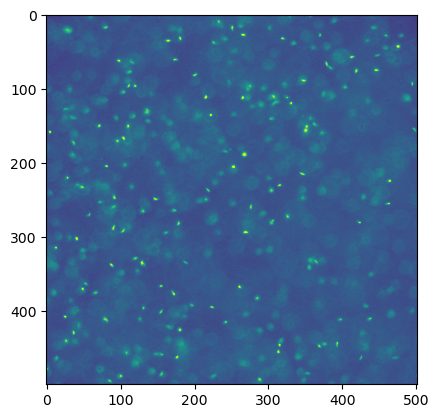

In [9]:
from matplotlib import pyplot as plt
plt.imshow(plantseg_image.get_data())

In [10]:
mz.get_model_names()


['generic_confocal_3D_unet',
 'generic_light_sheet_3D_unet',
 'confocal_3D_unet_ovules_ds1x',
 'confocal_3D_unet_ovules_ds2x',
 'confocal_3D_unet_ovules_ds3x',
 'confocal_2D_unet_ovules_ds2x',
 'lightsheet_3D_unet_root_ds1x',
 'lightsheet_3D_unet_root_ds2x',
 'lightsheet_3D_unet_root_ds3x',
 'lightsheet_2D_unet_root_ds1x',
 'lightsheet_3D_unet_root_nuclei_ds1x',
 'lightsheet_2D_unet_root_nuclei_ds1x',
 'confocal_2D_unet_sa_meristem_cells',
 'confocal_3D_unet_sa_meristem_cells',
 'lightsheet_3D_unet_mouse_embryo_cells',
 'confocal_3D_unet_mouse_embryo_nuclei',
 'PlantSeg_3Dnuc_platinum']

INFO: P [MainThread] 2024-12-18 13:37:52,235 plantseg.functionals.prediction.prediction - Zoo prediction: Running model from PlantSeg official zoo.
INFO: P [MainThread] 2024-12-18 13:37:52,251 plantseg.utils - Downloading file config_train.yml from https://zenodo.org/record/7774537/files/config_train.yml...
INFO: P [MainThread] 2024-12-18 13:37:52,253 plantseg.utils - Downloading file best_checkpoint.pytorch from https://zenodo.org/record/7774537/files/unet2d-lateral-root-lightsheet.pytorch...
INFO: P [MainThread] 2024-12-18 13:38:01,095 plantseg.functionals.prediction.prediction - Computing theoretical minimum halo from model.
INFO: P [MainThread] 2024-12-18 13:38:01,096 plantseg.functionals.prediction.prediction - For raw in shape (500, 502): set patch shape (1, 64, 64), set halo shape (0, 44, 44)
INFO: P [MainThread] 2024-12-18 13:38:01,176 plantseg.functionals.prediction.utils.array_predictor - Using batch size of 1 for prediction


100%|██████████| 121/121 [00:00<00:00, 127.51it/s]


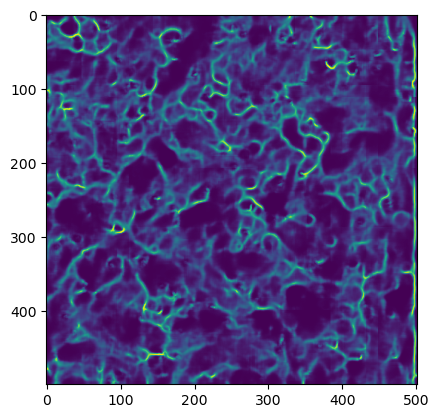

In [26]:
from plantseg.tasks import unet_prediction_task

predicted_images = unet_prediction_task(image=plantseg_image, model_name="lightsheet_2D_unet_root_ds1x", model_id=None, suffix="_prediction", patch=(1, 64, 64), device="cuda")  # Replace with the name of the model you wish to use  # Replace with the ID of the model you wish to use  # Suffix to append to the new image name  # Patch size for prediction; adjust as needed  # Specify 'cuda' for GPU or 'cpu' for CPU

plt.imshow(predicted_images[0].get_data())